In [1]:
from sklearn.datasets import load_files       
from keras.utils import np_utils
import numpy as np
from glob import glob
from keras.utils import to_categorical

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    dog_files = np.array(data['filenames'])
    dog_targets = to_categorical(np.array(data['target']), 133)
    return dog_files, dog_targets

test_files, test_targets = load_dataset('data/dogImages/test')

# load list of dog names
dog_names = [item[20:-1] for item in sorted(glob("data/dogImages/train/*/"))]

In [2]:
from keras.applications import ResNet50

# define ResNet50 model
ResNet50_model = ResNet50(weights='imagenet')

In [3]:
path = '/Users/bivanshrestha/Desktop/Dog Classification Websie/model_creation/saved-model/acc_0.8216_Resnet_model.h5'
from keras.models import load_model
Resnet_Model = load_model(path)
Resnet_Model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_5   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


In [4]:
import keras.utils as image                 
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In [5]:
from keras.applications.resnet import preprocess_input, decode_predictions

def ResNet50_predict_labels(img_path):
    # returns prediction vector for image located at img_path
    img = preprocess_input(path_to_tensor(img_path))
    return np.argmax(ResNet50_model.predict(img))

In [6]:

bottleneck_features = np.load('bottleneck_features/DogResnet50Data.npz')

test_Resnet = bottleneck_features['test']


In [7]:

Resnet_Predictions = [np.argmax(Resnet_Model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet]
# Reporting Test Accuracy
test_accuracy = 100*np.sum(np.array(Resnet_Predictions)==np.argmax(test_targets, axis=1))/len(Resnet_Predictions)
print('Test accuracy: %.4f%%' % test_accuracy)


1/1 [==============================] - 0s 9ms/step


2023-07-14 20:11:56.090497: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 9ms/step


1/1 [==============================] - 0s 8ms/step


1/1 [==============================] - 0s 8ms/step
Test accuracy: 82.2967%


In [8]:
def extract_Resnet50(tensor):
	return ResNet50(weights='imagenet', include_top=False).predict(preprocess_input(tensor))

def Resnet_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Resnet_Model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

In [9]:
import matplotlib.pyplot as plt
import cv2

def show_img(img_path):
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_display = plt.imshow(cv_rgb)
    return img_display

def predict_image(img_path):
    show_img(img_path)
    predicted_breed=Resnet_predict_breed(img_path).rsplit('.',1)[1].replace("_", " ")
    return "The predicted dog breed the "+ str(predicted_breed) + "."

1/1 [==============================] - 0s 10ms/step


'The predicted dog breed the German shepherd dog.'

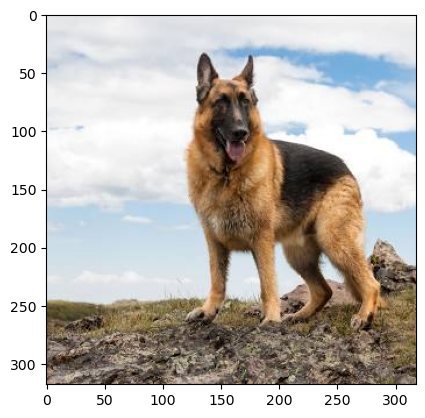

In [12]:
predict_image('Testing-user-images/german_shepherd_test.jpeg')

In [161]:
Resnet_Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 133)               272517    
                                                                 
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________
